# <font color=blue> **Desafio Final - Reclamações dos Consumidores Jaqueline Goes**

**Integrantes:**

Ana Claudia Caloi

Ângela Fernandes Rocha

Bruna Bernardo Pivotto

Deise Somaya Gomes da Silva

Marlana Portilho Rodrigues Santos

Talita de Lana Nacimento

Tatiane Pereira

**Como nos organizamos**

Cada uma desenvolveu o desafio como se sentiu mais confortável, no fim agrupamos as soluções neste arquivo de modo que todas estivessem de acordo com a solução final.

**Nossas Dificuldades**

Compreensão de alguns conceitos, precisamos pesquisar materiais complementares fora dos cursos;

**Nossas facilidades**

O prazo maior para desenvolver o desafio;

A sintonia que a equipe foi desenvolvendo com o passar do tempo e o desenvolvimento dos desafios.

# <font color=green> **Contexto**

Suponha que você trabalha na área de dados do Procon . Diariamente, você e sua equipe recebem dados de diversas reclamações dos consumidores. Cada reclamação, então, tem um determinado tempo para ser resolvida entre o cliente e a companhia em questão.

Dado esse contexto, a sua equipe recebeu do time de operações dados históricos de reclamações de 2012 a 2016 na pasta reclamações-consumidor.

Os dados são uma amostra dos dados extraídos do kaggle oriundos do Procon de 2012 a 2016
https://www.kaggle.com/datasets/gerosa/procon

De posse dessas informacoes, a sua equipe ficou encarregada de responder às
seguintes perguntas do time de negócios:


## <font color=green> 1. Análise dos dados

Instalação e habilitação de pacotes:

In [ ]:
!pip install gdown

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt ## graficos
import seaborn as sns ## graficos
import gdown #biblioteca para carregar os arquivos
import statsmodels.api as sm ## para rodar a regressao
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE ## selecao de features
from sklearn import  linear_model ## para rodar a regressao
pd.set_option('display.float_format', lambda x: '%.5f' % x)
from IPython.display import Markdown
from sklearn.impute import SimpleImputer

Carregando Dataframe:

In [ ]:
#file_id = ID do drive
file_id = '10fBbAcc5YUUQy0etjWSlLernQj-OSbnw'

In [ ]:
# URL direta para o arquivo no Google Drive
url = f'https://drive.google.com/uc?id={file_id}'

In [ ]:
# Nome do arquivo local no Colab
local_filename = 'procon2012-2016.csv'

In [ ]:
# Baixando o arquivo usando gdown
gdown.download(url, local_filename, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=10fBbAcc5YUUQy0etjWSlLernQj-OSbnw
To: /content/procon2012-2016.csv
100%|██████████| 434M/434M [00:05<00:00, 78.5MB/s]


'procon2012-2016.csv'

In [ ]:
# Lendo CSV diretamente no Colab
dados = pd.read_csv(local_filename)

<ipython-input-7-c2ef75ec402e>:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv(local_filename)


In [ ]:
dados.head()

,Unnamed: 0,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,...,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor
0,0,2012,2012-07-13 17:44:45.000,2009-09-17 10:48:42.000,3.00000,Sudeste,ES,IBI PROMOTORA DE VENDAS LTDA.,IBI CARD,1.00000,...,7490104.00000,ATIVIDADES DE INTERMEDIAÇÃO E AGENCIAMENTO DE ...,N,54.00000,Cartão de Crédito,32.00000,Calculo de prestação em atraso,F,mais de 70 anos,29072040
1,1,2012,2012-07-13 17:37:19.000,2009-09-17 10:02:24.000,3.00000,Sudeste,ES,SAMSUNG ELETRONICA DA AMAZONIA LTDA,SAMSUNG,1.00000,...,2640000.00000,"FABRICAÇÃO DE APARELHOS DE RECEPÇÃO, REPRODUÇÃ...",N,101.00000,"Telefone ( Convencional, Celular, Interfone, E...",102.00000,"Garantia (Abrangência, cobertura, etc.)",M,entre 31 a 40 anos,29115360
2,2,2012,2012-07-16 09:07:13.000,2009-09-17 11:36:47.000,3.00000,Sudeste,ES,LINNU''S AUTOMOVEIS LTDA.,LINNUS AUTOMOVEIS,1.00000,...,4512902.00000,COMÉRCIO SOB CONSIGNAÇÃO DE VEÍCULOS AUTOMOTORES,N,129.00000,Carro Nacional Zero ( Montadora ),111.00000,Venda enganosa,M,entre 21 a 30 anos,29060110
3,3,2012,2012-12-10 09:05:09.000,2009-09-21 09:01:49.000,5.00000,Centro-oeste,GO,AMAZON PC INDUSTRIA E COMERCIO DE MICROCOMPUTA...,AMAZON PC,1.00000,...,2621300.00000,FABRICAÇÃO DE EQUIPAMENTOS DE INFORMÁTICA,S,102.00000,Microcomputador / Produtos de Informática,102.00000,"Garantia (Abrangência, cobertura, etc.)",M,entre 21 a 30 anos,75911000
4,4,2012,2012-07-13 17:51:01.000,2009-09-18 17:32:22.000,3.00000,Sudeste,ES,OFFICINA REVESTIMENTOS LTDA ME,NaN,1.00000,...,4744005.00000,COMÉRCIO VAREJISTA DE MATERIAIS DE CONSTRUÇÃO ...,N,118.00000,Material de Acabamento de Construção Pronto (P...,116.00000,"Contrato/pedido/orçamento (rescisão, descumpri...",M,Nao Informada,29090120


In [ ]:
# Verificando o tamanho da base de dados
dados.shape

(1177011, 24)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177011 entries, 0 to 1177010
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1177011 non-null  int64  
 1   AnoCalendario          1177011 non-null  int64  
 2   DataArquivamento       1177010 non-null  object 
 3   DataAbertura           1177010 non-null  object 
 4   CodigoRegiao           1177010 non-null  float64
 5   Regiao                 1177010 non-null  object 
 6   UF                     1177010 non-null  object 
 7   strRazaoSocial         1177002 non-null  object 
 8   strNomeFantasia        982893 non-null   object 
 9   Tipo                   1177010 non-null  float64
 10  NumeroCNPJ             1125803 non-null  float64
 11  RadicalCNPJ            1124675 non-null  float64
 12  RazaoSocialRFB         1109819 non-null  object 
 13  NomeFantasiaRFB        534677 non-null   object 
 14  CNAEPrincipal     

Convertendo as colunas de data para o formato correto

In [ ]:
dados['DataAbertura'] = pd.to_datetime(dados['DataAbertura'])
dados['DataArquivamento'] = pd.to_datetime(dados['DataArquivamento'])

Criando as colunas que serão usadas posteriormente

In [ ]:
# Criando coluna de duração da reclamação em dias
dados['DuracaoReclamacao'] = (dados['DataArquivamento'] - dados['DataAbertura']).dt.days
#Criando a coluna de ano de abertura, já que temos apenas a coluna AnoCalendário referente ao ano de arquivamento da reclamação
dados['AnoAbertura'] = dados['DataAbertura'].dt.year
#Criando a coluna com ano e mes de abertura
dados['AnoMesAbertura'] = dados['DataAbertura'].dt.to_period('M')
dados['Mes'] = dados['DataAbertura'].dt.month
dados.head(3)

,Unnamed: 0,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,...,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor,DuracaoReclamacao,AnoAbertura,AnoMesAbertura,Mes
0,0,2012,2012-07-13 17:44:45,2009-09-17 10:48:42,3.00000,Sudeste,ES,IBI PROMOTORA DE VENDAS LTDA.,IBI CARD,1.00000,...,Cartão de Crédito,32.00000,Calculo de prestação em atraso,F,mais de 70 anos,29072040,1030.00000,2009.00000,2009-09,9.00000
1,1,2012,2012-07-13 17:37:19,2009-09-17 10:02:24,3.00000,Sudeste,ES,SAMSUNG ELETRONICA DA AMAZONIA LTDA,SAMSUNG,1.00000,...,"Telefone ( Convencional, Celular, Interfone, E...",102.00000,"Garantia (Abrangência, cobertura, etc.)",M,entre 31 a 40 anos,29115360,1030.00000,2009.00000,2009-09,9.00000
2,2,2012,2012-07-16 09:07:13,2009-09-17 11:36:47,3.00000,Sudeste,ES,LINNU''S AUTOMOVEIS LTDA.,LINNUS AUTOMOVEIS,1.00000,...,Carro Nacional Zero ( Montadora ),111.00000,Venda enganosa,M,entre 21 a 30 anos,29060110,1032.00000,2009.00000,2009-09,9.00000


In [ ]:
pd.options.display.float_format = '{:.5f}'.format #formantando como os dados serão exibidos para facilitar a visualização
dados.describe()

,Unnamed: 0,AnoCalendario,CodigoRegiao,Tipo,NumeroCNPJ,RadicalCNPJ,CNAEPrincipal,CodigoAssunto,CodigoProblema,DuracaoReclamacao,AnoAbertura,Mes
count,1177011.00000,1177011.00000,1177010.00000,1177010.00000,1125803.00000,1124675.00000,1106287.00000,1177010.00000,1176990.00000,1177010.00000,1177010.00000,1177010.00000
mean,588505.00000,2013.99953,2.92377,0.99720,25186708975118.17578,76455029.04622,5430885.00043,132.79729,117.93847,217.29366,2013.44791,6.32665
std,339773.95318,2.28194,1.14976,0.05285,26573218981872.86328,1788610829.61308,1616532.04850,67.94411,56.70268,334.04234,1.67932,3.37488
min,0.00000,20.00000,1.00000,0.00000,191.00000,0.00000,115600.00000,1.00000,1.00000,-18.00000,2005.00000,1.00000
25%,294252.50000,2013.00000,2.00000,1.00000,4169843000177.00000,4169843.00000,4693100.00000,92.00000,102.00000,45.00000,2012.00000,3.00000
50%,588505.00000,2014.00000,3.00000,1.00000,10835932000108.00000,10902858.00000,6110801.00000,102.00000,105.00000,97.00000,2014.00000,6.00000
75%,882757.50000,2015.00000,3.00000,1.00000,43447044000177.00000,43447044.00000,6422100.00000,186.00000,134.00000,222.00000,2015.00000,9.00000
max,1177010.00000,2016.00000,5.00000,1.00000,98669997000171.00000,99969343491.00000,9900800.00000,288.00000,262.00000,3975.00000,2016.00000,12.00000


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177011 entries, 0 to 1177010
Data columns (total 28 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1177011 non-null  int64         
 1   AnoCalendario          1177011 non-null  int64         
 2   DataArquivamento       1177010 non-null  datetime64[ns]
 3   DataAbertura           1177010 non-null  datetime64[ns]
 4   CodigoRegiao           1177010 non-null  float64       
 5   Regiao                 1177010 non-null  object        
 6   UF                     1177010 non-null  object        
 7   strRazaoSocial         1177002 non-null  object        
 8   strNomeFantasia        982893 non-null   object        
 9   Tipo                   1177010 non-null  float64       
 10  NumeroCNPJ             1125803 non-null  float64       
 11  RadicalCNPJ            1124675 non-null  float64       
 12  RazaoSocialRFB         11098

**Identificação e Tratamento de dados faltantes:**

In [ ]:
#Dados faltantes
display(Markdown("#### Quantidade faltante "))
display(dados.isnull().sum())

display(Markdown("#### Quantidade de linhas e linhas"))
display(dados.shape)

#### Quantidade faltante 

Unnamed: 0                    0
AnoCalendario                 0
DataArquivamento              1
DataAbertura                  1
CodigoRegiao                  1
Regiao                        1
UF                            1
strRazaoSocial                9
strNomeFantasia          194118
Tipo                          1
NumeroCNPJ                51208
RadicalCNPJ               52336
RazaoSocialRFB            67192
NomeFantasiaRFB          642334
CNAEPrincipal             70724
DescCNAEPrincipal         81843
Atendida                      1
CodigoAssunto                 1
DescricaoAssunto              1
CodigoProblema               21
DescricaoProblema            21
SexoConsumidor              972
FaixaEtariaConsumidor         1
CEPConsumidor             80787
DuracaoReclamacao             1
AnoAbertura                   1
AnoMesAbertura                1
Mes                           1
dtype: int64

#### Quantidade de linhas e linhas

(1177011, 28)

In [ ]:
# tratando nulos da coluna SexoConsumidor e substituindo pela moda (categórica nominal)
coluna_para_imputar = 'SexoConsumidor'

#imputer para substituir os valores ausentes pela moda
imputer_moda = SimpleImputer(strategy='most_frequent')

# Ajusta e transforma apenas na coluna desejada
dados[coluna_para_imputar] = imputer_moda.fit_transform(dados[[coluna_para_imputar]])

In [ ]:
# drop dos nulos(considerando apenas colunas com menos de 22 nulos)
limite_nulos = 22

# Calcula o número de dados nulos em cada coluna
dados_nulos_por_coluna = dados.isnull().sum()

# Filtra as colunas que têm menos de 'limite_nulos' dados nulos
colunas_a_manter = dados_nulos_por_coluna[dados_nulos_por_coluna <= limite_nulos].index

# Dropa as linhas nulas apenas nas colunas selecionadas
dados = dados.dropna(subset=colunas_a_manter)

### 1 - Existe alguma sazonalidade na data de abertura de uma reclamação? Ou seja mais consumidores abrem reclamacoes em determinada época do ano?




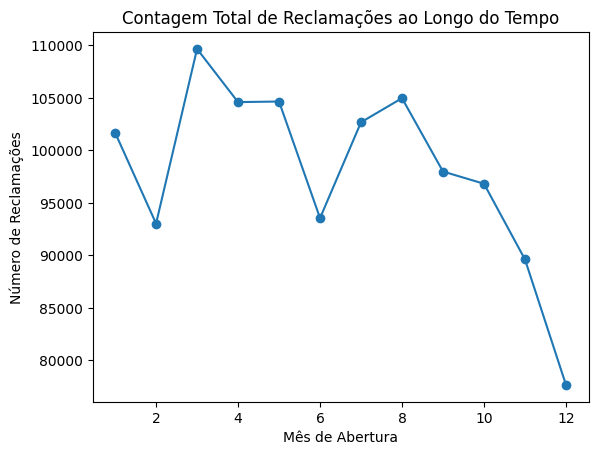

In [ ]:
# Cria uma cópia do df original
df_copy = dados.copy()

#Agrupamento por mês
contagem_total_por_mes = df_copy.groupby('Mes').size()

# Gráfico de linha para a contagem total mensal
contagem_total_por_mes.plot(kind='line', marker='o')
plt.title('Contagem Total de Reclamações ao Longo do Tempo')
plt.xlabel('Mês de Abertura')
plt.ylabel('Número de Reclamações')
plt.show()

Sim. A maior quantidade de aberturas acontece no mês de Março.

### 2 - Qual o tempo médio de uma reclamação ativa (da abertura até a data de fechamento)?



In [ ]:
media_duracao_reclamacao = dados['DuracaoReclamacao'].mean()
print(f"A média da duração da reclamação é: {media_duracao_reclamacao} dias")

A média da duração da reclamação é: 217.29261704936863 dias


### 3.1 - O numero de reclamações varia de acordo com a região?


**Análise contabilizando as reclamações de todos os anos:**

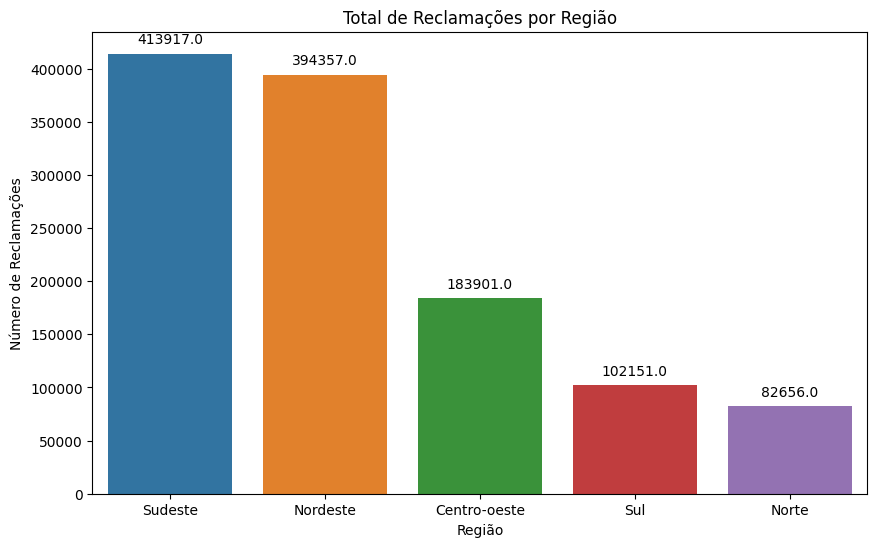

In [ ]:
# Agrupando o total de reclamações por região e ordenando
reclamacoes_por_regiao = dados.groupby(['Regiao']).size().reset_index(name='NumeroReclamacoesRegiao')
reclamacoes_por_regiao = reclamacoes_por_regiao.sort_values(by='NumeroReclamacoesRegiao', ascending=False)

# Plotando o gráfico
plt.figure(figsize=(10,6))
ax = sns.barplot(data=reclamacoes_por_regiao, x='Regiao', y='NumeroReclamacoesRegiao')

# Adicionando os valores das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Total de Reclamações por Região')
plt.xlabel('Região')
plt.ylabel('Número de Reclamações')
plt.show()

Observa-se que a região com maior número de reclamações é a Sudeste, seguida pela Região Nordeste.

**Análise considerando-se a evolução anual das reclamações:**

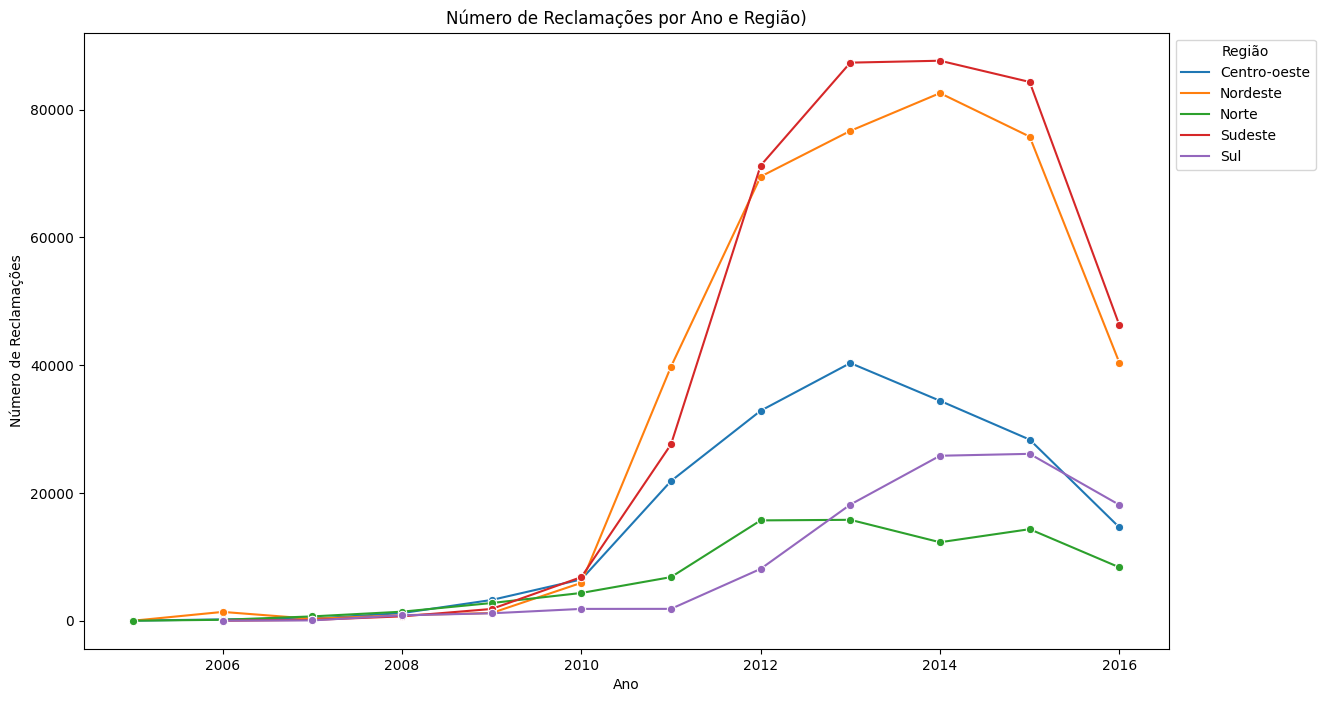

In [ ]:
# Agrupando o número anual de reclamações por região
reclamacoes_por_regiao_ano = dados.groupby(['AnoAbertura', 'Regiao']).size().reset_index(name='NumeroReclamacoes')

# Plotando o gráfico de linha
plt.figure(figsize=(14, 8))
sns.lineplot(x='AnoAbertura', y='NumeroReclamacoes', hue='Regiao', data=reclamacoes_por_regiao_ano, marker='o')
plt.title('Número de Reclamações por Ano e Região)')
plt.xlabel('Ano')
plt.ylabel('Número de Reclamações')
plt.legend(title='Região', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### 3.2 E de acordo com o estado?


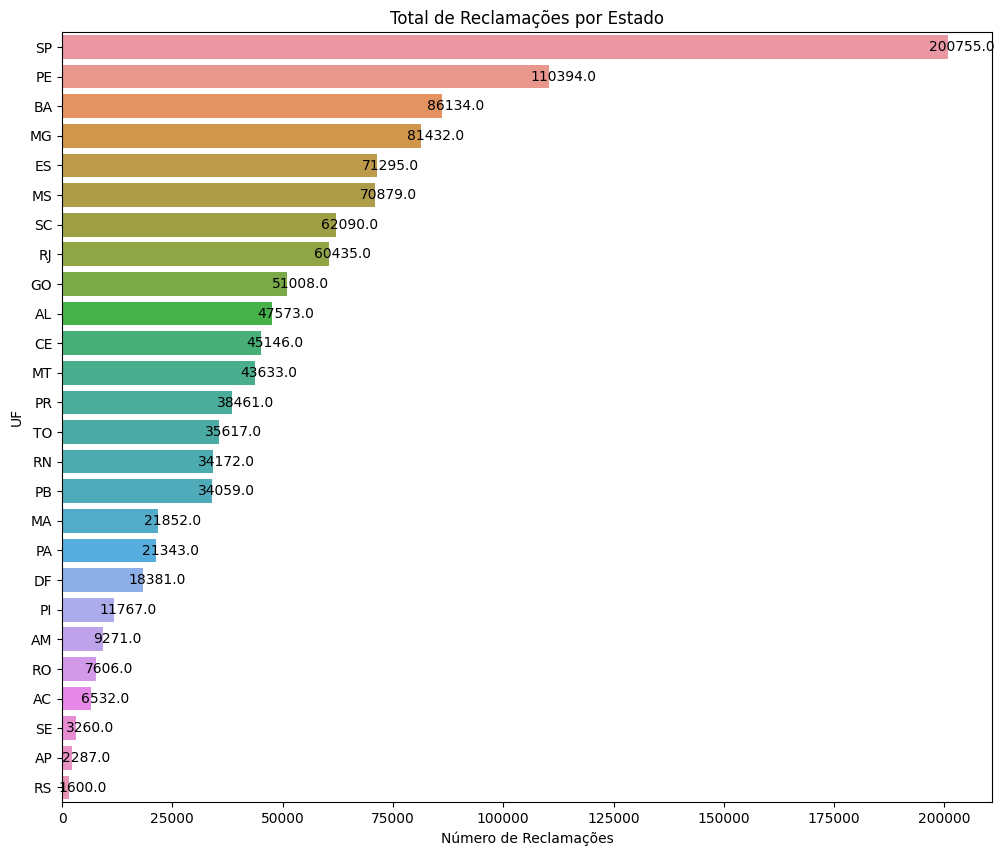

In [ ]:
# Agrupando o total de reclamações por Estado e ordenando
reclamacoes_por_uf = dados.groupby(['UF']).size().reset_index(name='NumeroReclamacoesUF')
reclamacoes_por_uf = reclamacoes_por_uf.sort_values(by='NumeroReclamacoesUF', ascending=False)

# Plotando o gráfico com barras horizontais
plt.figure(figsize=(12, 10))
ax = sns.barplot(data=reclamacoes_por_uf, y='UF', x='NumeroReclamacoesUF')

# Adicionando os valores das barras
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')

plt.title('Total de Reclamações por Estado')
plt.xlabel('Número de Reclamações')
plt.ylabel('UF')
plt.show()

Observa-se que o estado com maior número de reclamações é São Paulo na Região Sudeste, seguido por Pernambuco e Bahia no Nordeste.



### 3.3 - E se ponderarmos pela populacao média do estado?

In [ ]:
# Dados populacionais do censo 2022
populacao_dict = {
    'SP': 44411238,
    'MG': 20538718,
    'RJ': 16054524,
    'BA': 14141626,
    'PR': 11444380,
    'RS': 10882965,
    'PE': 9058931,
    'CE': 8794957,
    'PA': 8121025,
    'SC': 7610361,
    'GO': 7056495,
    'MA': 6775805,
    'PB': 3974687,
    'AM': 3941613,
    'ES': 3833712,
    'MT': 3658649,
    'RN': 3302729,
    'PI': 3272199,
    'AL': 3127683,
    'DF': 2817381,
    'MS': 2757013,
    'SE': 2209558,
    'RO': 1581196,
    'TO': 1511460,
    'AC': 830018,
    'AP': 733759,
    'RR': 636707
}

In [ ]:
# Adicionaando a população ao DataFrame 'dados'
dados['Populacao'] = dados['UF'].map(populacao_dict)

# Calculando o número total de reclamações por estado
total_reclamacoes_por_estado = dados.groupby('UF')['DuracaoReclamacao'].count().reset_index()

# Adicionaando a população ao DataFrame 'total_reclamacoes_por_estado'
total_reclamacoes_por_estado['Populacao'] = total_reclamacoes_por_estado['UF'].map(populacao_dict)

# Calculando o percentual de reclamações em relação à população
total_reclamacoes_por_estado['Percentual_Reclamacoes_Populacao'] = (total_reclamacoes_por_estado['DuracaoReclamacao'] / total_reclamacoes_por_estado['Populacao']) * 100

# Ordenando por percentual de reclamações em ordem decrescente
total_reclamacoes_por_estado = total_reclamacoes_por_estado.sort_values(by='Percentual_Reclamacoes_Populacao', ascending=False)

# Imprime o resultado
print(total_reclamacoes_por_estado[['UF', 'Percentual_Reclamacoes_Populacao']])

    UF  Percentual_Reclamacoes_Populacao
11  MS                           2.57086
25  TO                           2.35646
7   ES                           1.85969
1   AL                           1.52103
15  PE                           1.21862
12  MT                           1.19260
19  RN                           1.03466
14  PB                           0.85690
22  SC                           0.81586
0   AC                           0.78697
8   GO                           0.72285
6   DF                           0.65241
4   BA                           0.60908
5   CE                           0.51332
20  RO                           0.48103
24  SP                           0.45204
10  MG                           0.39648
18  RJ                           0.37644
16  PI                           0.35961
17  PR                           0.33607
9   MA                           0.32250
3   AP                           0.31168
13  PA                           0.26281
2   AM          

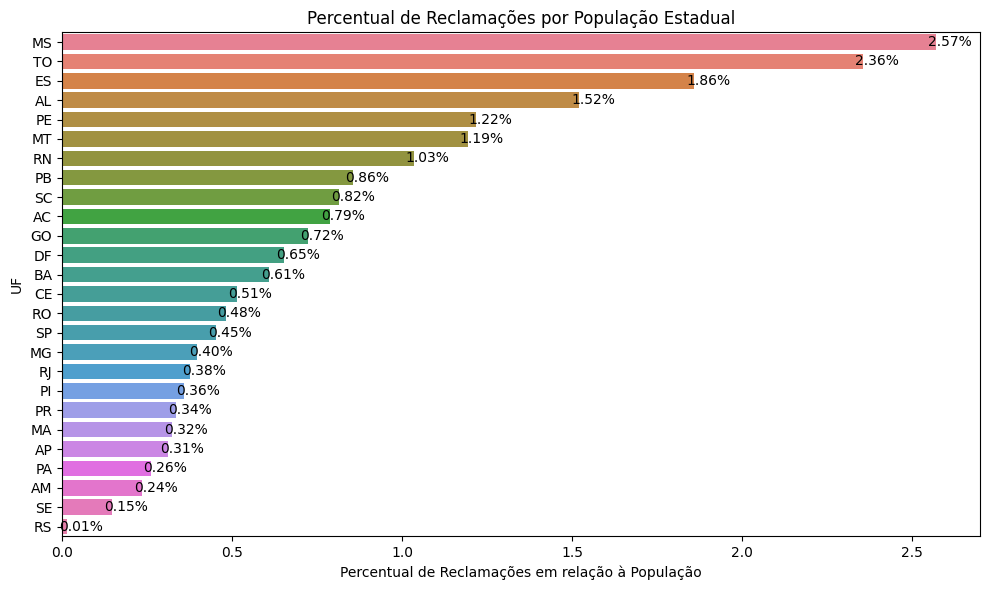

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=total_reclamacoes_por_estado, y='UF', x='Percentual_Reclamacoes_Populacao', palette='husl')

# Adicionar os valores das barras
for p in ax.patches:
    width = p.get_width()
    plt.annotate(f'{width:.2f}%', xy=(width, p.get_y() + p.get_height() / 2),
                 ha='center', va='center', xytext=(10, 0), textcoords='offset points')

plt.title('Percentual de Reclamações por População Estadual')
plt.xlabel('Percentual de Reclamações em relação à População')
plt.ylabel('UF')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

Os estados com mais reclamação em relação a população são MS, TO, ES, AL, PE  

### 4.1 - Quais as empresas que receberam mais reclamações dos consumidores?

In [ ]:
# Contar o número de reclamações por empresa
reclamacoes_por_empresa = dados['strRazaoSocial'].value_counts().reset_index(name='NumeroReclamacoes')
reclamacoes_por_empresa.columns = ['Empresa', 'NumeroReclamacoes']

# Mostrar as top 10 empresas com mais reclamações
top_empresas = reclamacoes_por_empresa.head(10)
print(top_empresas)

                               Empresa  NumeroReclamacoes
0              TELEMAR NORTE LESTE S/A              17943
1  SAMSUNG ELETRONICA DA AMAZONIA LTDA              14097
2                           CLARO S.A.               9594
3                          TNL PCS S/A               9508
4              CAIXA ECONOMICA FEDERAL               9028
5                            CLARO S/A               9027
6             ELECTROLUX DO BRASIL S/A               8121
7             SKY BRASIL SERVICOS LTDA               7850
8                TELEFONICA BRASIL S/A               7372
9                       VIA VAREJO S/A               7183


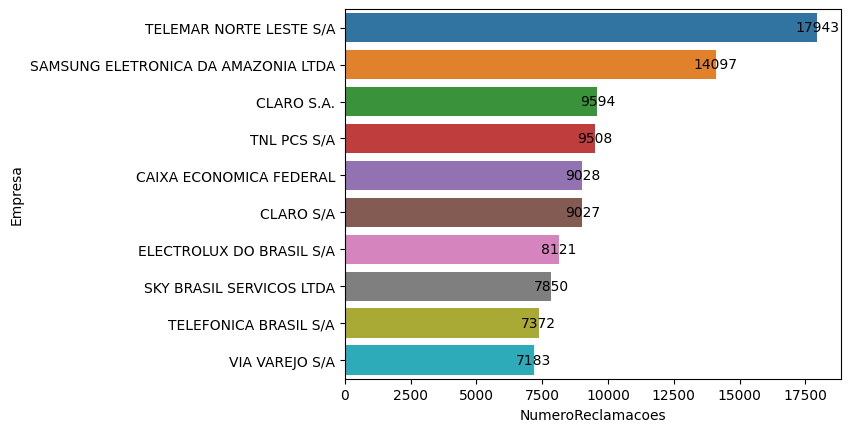

In [ ]:
sns.barplot(data=top_empresas,
            x='NumeroReclamacoes',
            y='Empresa')


# definindo variáveis de anotações do gráfico
n = range(top_empresas.Empresa.shape[0])
s = top_empresas.NumeroReclamacoes.values


# criando função para a visualização dos valores na barra
for i in range(len(s)):
    plt.annotate(s[i],
                 xy=(s[i]*1.0, n[i]), fontsize=10,
                 ha='center',
                 va="center")


### 4.2 - Quais as empresas que receberam mais reclamações dos consumidores por região e estado?

**Por região:**

In [ ]:
# Agrupando por região e empresa, contando o número de reclamações
reclamacoes_por_empresa_regiao = dados.groupby(['Regiao', 'strRazaoSocial']).size().reset_index(name='NumeroReclamacoes')

# Ordenando do maior para o menor
reclamacoes_por_empresa_regiao = reclamacoes_por_empresa_regiao.sort_values(by='NumeroReclamacoes', ascending=False)

# Mostrando as empresas com mais reclamações por região
empresas_mais_reclamacoes_por_regiao = reclamacoes_por_empresa_regiao.groupby('Regiao').head(1)
print(empresas_mais_reclamacoes_por_regiao)

              Regiao                 strRazaoSocial  NumeroReclamacoes
54360       Nordeste        TELEMAR NORTE LESTE S/A              10026
110625       Sudeste          TELEFONICA BRASIL S/A               7240
1059    Centro-oeste                   AMERICEL S/A               3166
131402           Sul               TIM CELULAR S.A.               1600
57235          Norte  14 BRASIL TELECOM CELULAR S/A               1319


**Por estado:**

In [ ]:
# Agrupando por estado e empresa, contando o número de reclamações
reclamacoes_por_empresa_estado = dados.groupby(['UF', 'strRazaoSocial']).size().reset_index(name='NumeroReclamacoes')

# Ordenando do maior para o menor
reclamacoes_por_empresa_estado = reclamacoes_por_empresa_estado.sort_values(by='NumeroReclamacoes', ascending=False)

# Mostrando as empresas com mais reclamações por estado
empresas_mais_reclamacoes_por_estado = reclamacoes_por_empresa_estado.groupby('UF').head(1)
print(empresas_mais_reclamacoes_por_estado)

        UF                                     strRazaoSocial  \
140469  SP                              TELEFONICA BRASIL S/A   
51047   MG                          TELEMAR NORTE E LESTE S/A   
28496   ES                            TELEMAR NORTE LESTE S/A   
98365   RJ                                     VIA VAREJO S.A   
10573   BA                            TELEMAR NORTE LESTE S/A   
83464   PE                  TELEMAR NORTE LESTE S/A - OI FIXO   
15747   CE                            TELEMAR NORTE LESTE S/A   
52716   MS                                       AMERICEL S/A   
39565   MA                            TELEMAR NORTE LESTE S/A   
115685  SC                                   TIM CELULAR S.A.   
72573   PB                                        TNL PCS S/A   
61680   MT  CAB CUIABA S/A - CONCESSIONARIA DE SERVICOS PU...   
145635  TO               NOSSO LAR LOJAS DE DEPARTAMENTO LTDA   
2695    AL                              LOJAS INSINUANTE LTDA   
32668   GO               

## <font color=green> 2. Modelagem: Prevendo o tempo de uma reclamação ativa

In [ ]:
dados2 = dados.copy() #fazendo cópia para tratar algumas colunas para modelagem sem alterar o DF original

**Análise de Colunas Categóricas que podem ser relevantes para a regressão**

In [ ]:
dados2['Atendida'].unique()

array(['N', 'S'], dtype=object)

In [ ]:
dados2['FaixaEtariaConsumidor'].value_counts()

entre 31 a 40 anos    268997
entre 41 a 50 anos    227020
entre 21 a 30 anos    199175
entre 51 a 60 anos    180627
entre 61 a 70 anos    117177
Nao Informada         103467
mais de 70 anos        56249
até 20 anos            23530
Nao se aplica            740
Name: FaixaEtariaConsumidor, dtype: int64

In [ ]:
dados2['FaixaEtariaConsumidor'].unique()

array(['mais de 70 anos', 'entre 31 a 40 anos', 'entre 21 a 30 anos',
       'Nao Informada', 'entre 41 a 50 anos', 'entre 51 a 60 anos',
       'entre 61 a 70 anos', 'Nao se aplica', 'até 20 anos'], dtype=object)

In [ ]:
# Alterando os dados para numéricos
dados2['Atendida'] = dados2['Atendida'].map({'S': 1, 'N': 0})
faixa_etaria_map = {
    'Nao Informada': 0,
    'Nao se aplica': 1,
    'até 20 anos': 2,
    'entre 21 a 30 anos': 3,
    'entre 31 a 40 anos': 4,
    'entre 41 a 50 anos': 5,
    'entre 51 a 60 anos': 6,
    'entre 61 a 70 anos': 7,
    'mais de 70 anos': 8
}

dados2['FaixaEtariaConsumidor'] = dados2['FaixaEtariaConsumidor'].map(faixa_etaria_map)



```
# Isto está formatado como código
```

###1- Quais variáveis podem estar mais correlacionadas com o tempo de uma reclamação ativa?


In [ ]:
corr = dados2.corr()
corr["DuracaoReclamacao"].sort_values(ascending = False)

<ipython-input-35-6f671dc818c6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dados2.corr()


DuracaoReclamacao        1.00000
RadicalCNPJ              0.00913
Tipo                    -0.00466
Mes                     -0.00988
NumeroCNPJ              -0.01835
Unnamed: 0              -0.02269
CNAEPrincipal           -0.02284
CodigoRegiao            -0.02530
AnoCalendario           -0.02670
FaixaEtariaConsumidor   -0.03023
CodigoAssunto           -0.04376
CodigoProblema          -0.06420
Populacao               -0.12851
Atendida                -0.16983
AnoAbertura             -0.56149
Name: DuracaoReclamacao, dtype: float64

No caso da variável AnoAbertura, um valor de correlação de -0,56149 indica uma forte correlação negativa. Isso significa que reclamações abertas em anos anteriores tendem a durar mais tempo do que reclamações abertas em anos mais recentes.

No caso da variável Atendida, um valor de correlação de -0,16984 indica uma correlação negativa moderada. Isso significa que reclamações que são atendidas tendem a durar menos tempo do que reclamações que não são atendidas.

No caso das variáveis CodigoProblema e CodigoAssunto, um valor de correlação de -0,06420 e -0,04377, respectivamente, indica uma correlação negativa fraca a depender do tipo de problema ou assunto.

###2- Construa variáveis que podem estar correlacionadas com o tempo de uma reclamação ativa a partir dos dados. Exemplo: crie variáveis dummy referentes ao período do ano; região


In [ ]:
# Extrai trimestre da coluna 'DataAbertura'
dados2['TrimestreAbertura'] = dados2['DataAbertura'].dt.quarter

# 1. Cria variáveis dummy para o trimestre do ano
dados2 = pd.get_dummies(dados2, columns=['TrimestreAbertura'], prefix='Trimestre')

# 2. Cria variáveis dummy para a região
dados2 = pd.get_dummies(dados2, columns=['Regiao'], prefix='Regiao')

# 3. Cria variável dummy para o estado (UF)
dados2 = pd.get_dummies(dados2, columns=['UF'], prefix='Estado')

# 4. Cria variáveis dummy para o sexo
dados2 = pd.get_dummies(dados2, columns=['SexoConsumidor'], prefix='Sexo')

###3- Analise a correlação das variáveis


In [ ]:
corr2 = dados2.corr()
corr2["DuracaoReclamacao"].sort_values(ascending = False)

<ipython-input-37-25c5fe526151>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr2 = dados2.corr()


DuracaoReclamacao        1.00000
Estado_TO                0.24442
Regiao_Norte             0.18902
Estado_BA                0.14357
Estado_AP                0.10895
Estado_DF                0.10116
Regiao_Centro-oeste      0.09963
Estado_MT                0.09605
Estado_SE                0.06446
Estado_GO                0.05755
Estado_RS                0.04679
Sexo_N                   0.04590
Estado_PA                0.03415
Estado_AC                0.02723
Trimestre_1              0.01731
Sexo_M                   0.01297
RadicalCNPJ              0.00913
Trimestre_4              0.00442
Trimestre_2             -0.00282
Tipo                    -0.00466
Estado_MG               -0.00709
Estado_AL               -0.00774
Mes                     -0.00988
Estado_PB               -0.01150
Estado_SC               -0.01697
Estado_AM               -0.01748
NumeroCNPJ              -0.01835
Trimestre_3             -0.01868
Sexo_F                  -0.02038
Regiao_Nordeste         -0.02098
Unnamed: 0

Análise das variáveis mais correlacionadas:

**Positivamente Correlacionadas:**

* Estado_TO (0.24442): Existe uma correlação positiva moderada entre a variável "DuracaoReclamacao" e a variável "Estado_TO". Isso significa que reclamações em determinados estados podem ter uma duração mais longa.

* Regiao_Norte (0.18902): Existe uma correlação positiva moderada entre a variável "DuracaoReclamacao" e a variável "Regiao_Norte". Isso sugere que a região geográfica pode influenciar a duração das reclamações.

* Estado_BA (0.14357): Há uma correlação positiva, mas mais fraca, entre a variável "DuracaoReclamacao" e a variável "Estado_BA".

**Negativamente Correlacionadas:**

* AnoAbertura (-0.56149): Existe uma correlação negativa forte entre a variável "DuracaoReclamacao" e a variável "AnoAbertura". Isso sugere que ao longo dos anos, a duração das reclamações pode ter diminuído.

* Atendida (-0.16983): Existe uma correlação negativa, mas moderada, entre a variável "DuracaoReclamacao" e a variável "Atendida". Isso pode indicar que reclamações que são atendidas mais rapidamente tendem a ter uma duração menor.

* Regiao_Sudeste (-0.12529): Há uma correlação negativa, porém mais fraca, entre a variável "DuracaoReclamacao" e a variável "Regiao_Sudeste".

###4 - Construa um modelo de regressão linear em que queremos estimar o tempo de uma reclamação ativa.

In [ ]:
# Dataframe X com as variáveis explicativas possíveis
variaveis_explicativas = [
    'AnoAbertura', 'Estado_TO', 'Regiao_Norte', 'Estado_BA', 'Regiao_Sudeste', 'Estado_SP',
    'Estado_AP', 'Estado_DF', 'Regiao_Centro-oeste', 'Estado_MT', 'Estado_PR', 'Estado_PE',
    'Estado_SE', 'CodigoProblema', 'Estado_RN', 'Estado_GO', 'Estado_CE', 'Regiao_Sul',
    'Estado_RS', 'Sexo_N', 'CodigoAssunto', 'Estado_RO', 'Estado_RJ', 'Estado_PA', 'Estado_MA',
    'Estado_AC', 'AnoCalendario', 'Estado_MS', 'Estado_PI', 'Estado_ES', 'CodigoRegiao',
    'Regiao_Nordeste', 'Sexo_F', 'Trimestre_3', 'Estado_AM', 'Trimestre_1', 'Estado_SC', 'Sexo_M', 'Estado_PB', 'Mes', 'Estado_AL',
    'Estado_MG'
]

X = dados2[variaveis_explicativas]

# temos uma pandas series com a variável target, que queremos explicar
y = dados2['DuracaoReclamacao']


In [ ]:
###Destinou-se 20% para teste e 80% para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
### SELECAO DE VARIAVEIS UTILIZANDO ELIMINACAO RECURSIVA (1)

### criamos uma variável modelo
model = linear_model.LinearRegression()

## chamamos a função RFE (recursive feature elimination)
rfe = RFE(estimator=model, n_features_to_select=10) #parâmetro de seleção
## treinamos o modelo
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [ ]:
from operator import itemgetter
### vamos printar a baixo o resultado do RFE
features = X_train.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

1 AnoAbertura
1 Estado_AP
1 Estado_SE
1 Estado_RS
1 Estado_RO
1 AnoCalendario
1 Trimestre_3
1 Estado_AM
1 Trimestre_1
1 Mes
2 Regiao_Norte
3 Estado_RJ
4 Estado_SP
5 Estado_PR
6 Regiao_Sul
7 Estado_SC
8 Estado_PI
9 Estado_RN
10 Estado_TO
11 Estado_ES
12 Estado_PE
13 Estado_MS
14 Estado_MG
15 Estado_CE
16 Sexo_N
17 Estado_MT
18 Estado_AL
19 Estado_PB
20 Regiao_Centro-oeste
21 Regiao_Nordeste
22 Regiao_Sudeste
23 Estado_PA
24 Estado_AC
25 Sexo_F
26 Sexo_M
27 Estado_BA
28 Estado_MA
29 CodigoRegiao
30 Estado_DF
31 Estado_GO
32 CodigoAssunto
33 CodigoProblema


Conclusão: utilizando a eliminacao de features recursiva, vimos que as principais variáveis que devemos incluir no modelo são as rankeadas em 1 lugar.  **AnoAbertura, Estado_AP, Estado_SE, Estado_RS, Estado_RO, AnoCalendario, Trimestre_3, Estado_AM, Trimestre_1, Mes**

## **Regressão Linear**

In [ ]:
# usando apenas as variaveis selecionadas
X = dados2[['AnoAbertura','Estado_AP', 'Estado_SE', 'Estado_RS', 'Estado_RO',
           'AnoCalendario', 'Trimestre_3','Estado_AM', 'Trimestre_1', 'Mes' ]]
y = dados2['DuracaoReclamacao']

In [ ]:
# normalizando X para que fiquem entre 0 e 1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

In [ ]:
# Divisão dos conjuntos de treinamento
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2)


In [ ]:
### treinando o modelo
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Previsões usando o conjunto de teste
y_pred = model.predict(X_test)

Outras métricas de regressão como critério de comparação entre modelos estimados e de seleção do melhor modelo são Erro Absoluto Médio (mae), Erro Quadrático Médio (mse), Raíz do Erro Quadrático Médio (rmse) e Coeficiente de Determinação (r2). Assim:

a) Erro Absoluto Médio (mae): mede a diferença absoluta média entre os valores previstos e reais. Mae mais baixo significa que as previsões do nosso modelo estão mais próximas dos valores reais.

b) Erro Quadrático Médio (mse): Média dos quadrados dos erros. Ajustes melhores apresentam  EQM  mais baixo.

c) Raiz do Erro Quadrático Médio (rmse): Raiz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam raiz mais baixa.

d) Coeficiente de Determinação (r2): é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entre 0 e 1, ou seja, quanto mais próximo de 1, melhor.

Apesar dos resultados de mae, mse e rmse não apresentarem bons resultados, o R² mostra um bom desempenho (92%).

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Imprima as métricas
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 77.11982037711752
MSE: 8952.793897151603
RMSE: 94.61920469519707
R²: 0.9200324819204595


**Análise de Resíduo**

Pelo gráfico abaixo podemos ver que os resíduos do modelo fitado parecem ter distribuição normal e parecem estar bem dispersos, o que é um bom compartamento. Além disso, o R² é de 92%, ou seja, modelo linear explica 92% da variância da variável dependente a partir dos regressores (variáveis independentes) incluídas no modelo linear.

In [ ]:
from yellowbrick.regressor import ResidualsPlot


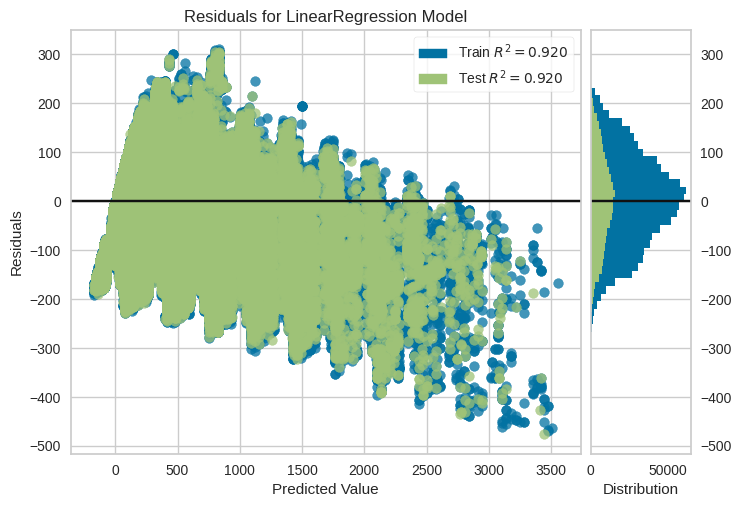

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train.values)
visualizer.score(X_test, y_test.values)
visualizer.show()

O Gráficos Q-Q (Quantile-Quantile) é uma ferramenta de visualização estatística usada para determinar se um conjunto de dados segue ou se aproxima de uma distribuição de probabilidade específica, geralmente a distribuição normal.

Esse gráfico compara os quantis teóricos esperados de uma distribuição com os quantis observados dos dados reais.

A interpretação dos gráficos Q-Q é que, quanto mais os pontos se aproximam da linha diagonal, mais os dados reais se assemelham à distribuição normal, como pode ser visto no **gráfico abaixo**.

Se os pontos estiverem fora da linha diagonal, isso sugere desvios da normalidade.

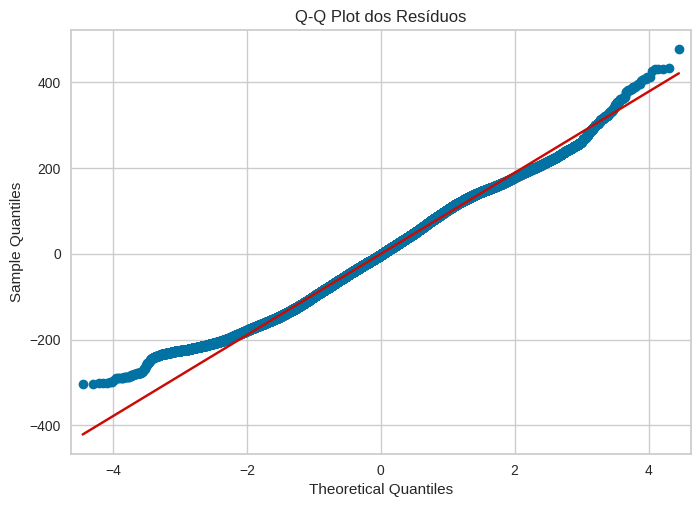

In [ ]:
# Calcule os resíduos
residuos = y_test - y_pred

# Crie um Q-Q plot dos resíduos
sm.qqplot(residuos, line='s')
plt.title('Q-Q Plot dos Resíduos')
plt.show()

Por fim, a outra forma de analisar os resíduos é por meio da desindade. No gráfico abaixo, verifica-se que os resíduos do nosso modelo se aproximam de uma curva de densidade normal.

<ipython-input-56-ed62c7504afb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuos, fit=norm, kde=True)


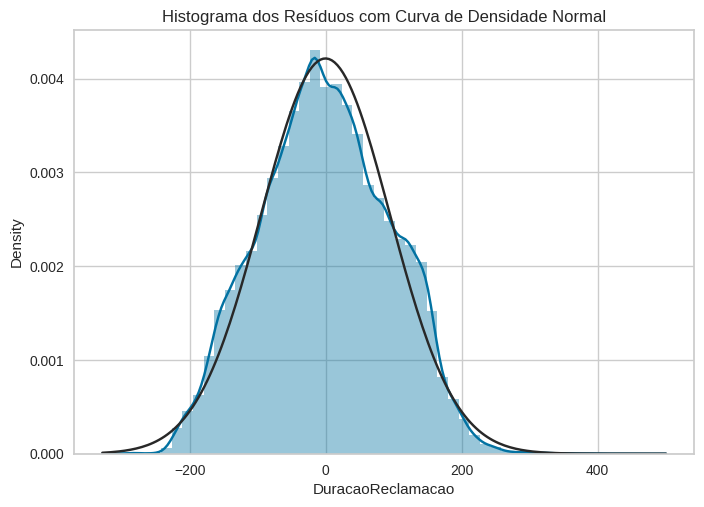

In [ ]:
from scipy.stats import norm

sns.distplot(residuos, fit=norm, kde=True)
plt.title('Histograma dos Resíduos com Curva de Densidade Normal')
plt.show()

**Estimativa do tempo de uma reclamação ativa**

In [ ]:
### Exemplo do passo 1:
import pickle
# salvando o modelo em um arquivo binário
filename = './finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))

### Lendo o modelo salvo posteriormente
modelo_salvo = pickle.load(open(filename, 'rb'))
result = modelo_salvo.predict(X_test[:1])
print(result)

[367.92242113]


O resultado acima mostra a estimativa do tempo de uma reclamação ativa em dias.